STUDY II

In [1]:
import numpy as np
import pandas as pd
from pandas.io import sql
import sqlalchemy as sa
import yaml as yml
import json
#import demjson
get_ipython().magic(u'matplotlib inline')
import scipy.stats as ssp
from matplotlib import pyplot as plt
from __future__ import division

In [2]:
pd.set_option('display.max_columns', None)

In [82]:
df = pd.read_csv("BFAS_STUDY_II_DEDUPED.csv")
#df = df.convert_objects(convert_numeric=True)


In [83]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [84]:
df.head()

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,datastring
0,A115PR5C0O03UJ:36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA,36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA,A115PR5C0O03UJ,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,safari,macos,UNKNOWN,0,0,2.0,2014-11-04 19:01:43,2014-11-04 19:03:27,2014-11-04 19:12:11,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
1,A119Y1O8BULMQI:3PWWM24LHSZLXZ6NAU7S5YFGHER822,3PWWM24LHSZLXZ6NAU7S5YFGHER822,A119Y1O8BULMQI,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,chrome,windows,UNKNOWN,0,0,2.0,2014-11-04 18:39:26,2014-11-04 18:39:48,2014-11-04 18:51:36,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
2,A11RAQ3AXKIX6J:33PPUNGG386HLFOVYAM6JQKSSFERZ5,33PPUNGG386HLFOVYAM6JQKSSFERZ5,A11RAQ3AXKIX6J,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,chrome,windows,UNKNOWN,0,0,2.0,2014-11-04 18:53:28,2014-11-04 18:53:47,2014-11-04 19:09:17,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
3,A127IRK7LVV5NU:3300DTYQT2IJYJIZP8JTTQ958N3EQL,3300DTYQT2IJYJIZP8JTTQ958N3EQL,A127IRK7LVV5NU,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,firefox,windows,UNKNOWN,0,0,2.0,2014-11-04 18:47:34,2014-11-04 18:47:50,2014-11-04 18:56:15,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
4,A128W22BIT8D9O:3DHE4R9OCWC0QEC5TSJGXBWE5X5G2R,3DHE4R9OCWC0QEC5TSJGXBWE5X5G2R,A128W22BIT8D9O,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,chrome,macos,UNKNOWN,0,0,2.0,2014-11-04 18:52:55,2014-11-04 18:53:20,2014-11-04 19:00:46,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."


In [85]:
len(df)

374

In [86]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print( row)
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
    #print row
        return pd.Series(row)


In [87]:
df=df[df['status']==4]


In [88]:
len(df)

374

In [89]:
df = df.apply(takestring,axis=1)
#df = df.convert_objects(convert_numeric=True)

In [90]:
len(df)

374

In [91]:
tdf = df.convert_dtypes(convert_string=False,convert_integer=False)

In [81]:
df = df.iloc[:,0:-17].astype(float)

In [16]:
df = df[df['BFAS-1+'].notnull()]


In [17]:
len(df)

374

In [23]:
df.columns

Index(['BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-11+', 'BFAS-12+', 'BFAS-13+',
       'BFAS-14+', 'BFAS-15+', 'BFAS-16+', 'BFAS-17-',
       ...
       'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+',
       'PBR_6-', 'PBR_7-', 'PBR_8-'],
      dtype='object', length=126)

In [24]:
print (df.columns.tolist()[-26:])
print( len(df.columns.tolist()[-26:]))

['IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-', 'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+', 'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-']
26


In [26]:
fdf = df#.iloc[:,0:-17].astype(float)

In [27]:
df['IE_21+']

0      99.44
1      72.40
2      50.00
3      50.00
4      50.00
       ...  
369    51.34
370    87.69
371    50.00
372    50.00
373    50.00
Name: IE_21+, Length: 374, dtype: float64

In [70]:
df.head()

,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,IE_19+,IE_20+,IE_21+,IE_22-,IE_23-,IE_24+,IE_25-,IE_26-,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,OPG_17-,OPG_18-,OPG_9+,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-
0,60.02,24.83,79.96,89.98,89.76,89.98,20.04,19.49,9.91,10.02,99.22,35.08,69.71,99.33,9.69,0.78,0.67,0.78,10.02,99.67,90.09,99.11,99.11,39.64,14.81,0.45,99.89,89.98,59.91,89.76,9.91,69.71,10.13,9.80,44.65,100.00,60.36,60.02,34.86,34.41,64.59,79.73,89.76,44.65,64.81,24.61,39.42,10.36,0.67,0.67,29.40,0.11,34.52,99.11,99.55,99.22,34.63,90.20,0.67,0.56,69.60,44.32,20.04,98.89,99.44,24.72,34.63,74.72,25.50,24.61,60.13,10.24,35.30,19.27,89.87,99.55,29.51,70.16,1.00,69.93,69.82,24.83,10.13,34.74,20.16,99.00,70.04,59.24,10.13,84.86,89.76,99.67,10.13,0.89,39.87,90.20,89.76,54.79,69.49,29.84,34.41,75.17,99.44,89.87,99.22,0.67,34.63,9.69,90.20,9.69,74.39,29.51,1.00,98.89,29.73,10.02,74.83,39.64,99.33,29.62,99.67,99.78,99.89,10.47,0.33,0.45
1,0.00,94.63,14.48,15.12,4.83,55.10,54.19,14.57,0.00,72.95,82.79,84.70,15.12,63.30,56.10,63.57,54.19,54.64,55.37,72.68,45.81,44.26,5.92,4.92,17.94,4.74,100.00,94.99,49.64,0.00,72.40,0.00,0.00,0.00,0.00,70.04,74.68,79.14,40.98,44.54,80.87,82.70,57.74,33.88,85.06,0.00,77.41,54.46,9.93,64.66,50.00,42.81,53.19,82.97,24.59,39.53,54.55,59.74,64.75,74.68,54.83,52.91,64.85,85.06,70.13,44.72,95.08,58.20,59.93,85.34,55.74,59.38,5.01,50.00,39.98,54.46,44.44,100.00,55.01,83.79,74.95,40.44,100.00,100.00,59.56,100.00,100.00,72.13,90.07,94.99,100.00,24.86,19.95,5.01,94.90,44.54,69.76,39.89,35.43,34.61,9.84,29.14,72.40,72.31,89.89,77.60,69.76,67.67,100.00,89.89,59.02,59.93,0.00,100.00,49.73,44.63,59.38,100.00,85.06,17.58,84.88,72.31,61.93,22.68,24.95,20.31
2,26.78,31.79,10.08,50.00,9.74,62.86,9.80,79.23,27.56,52.51,70.10,50.00,32.46,44.27,88.47,80.68,96.05,86.92,89.48,10.41,11.64,14.09,9.86,11.53,14.76,71.99,77.34,70.21,64.98,10.75,10.19,9.97,10.08,89.25,15.65,63.64,95.16,91.48,76.34,9.80,10.19,10.13,38.47,10.86,65.53,91.48,42.48,76.78,67.09,64.76,69.21,90.14,67.43,75.00,41.26,59.52,71.99,18.21,89.14,25.11,75.78,82.68,69.77,75.11,67.09,60.41,81.24,20.10,79.12,74.89,80.01,71.21,89.48,44.15,51.61,19.77,32.57,85.91,65.09,87.47,90.76,24.44,11.08,59.74,33.35,98.05,95.38,68.32,67.65,98.61,98.83,0.39,10.08,10.41,76.22,64.53,95.71,80.68,83.35,37.92,100.00,90.92,50.00,20.77,100.00,64.42,50.00,50.00,99.83,9.41,72.10,50.00,50.00,90.26,50.00,9.52,72.10,72.77,50.00,10.86,67.98,90.03,83.74,9.52,70.66,8.96
3,23.03,43.52,24.44,69.24,30.82,66.90,52.65,38.95,26.64,36.28,79.15,35.05,33.49,50.00,84.61,72.80,84.16,79.48,73.58,24.47,19.65,13.23,30.71,50.00,25.36,45.07,77.81,85.39,75.14,13.78,12.11,12.33,11.22,20.88,53.20,35.27,60.22,68.46,59.30,61.89,14.67,29.15,64.23,20.69,34.38,46.08,52.87,82.49,78.37,47.30,66.23,66.46,79.93,18.63,28.26,22.25,60.55,41.62,44.63,52.87,60.33,52.65,75.22,52.20,50.00,78.15,57.88,65.23,44.07,70.58,45.85,33.60,45.30,60.11,71.91,46.86,57.55,70.46,53.65,67.35,69.13,32.38,14.34,74.64,30.93,86.28,85.05,63.20,83.27,71.58,83.38,16.20,18.35,41.07,34.61,74.75,75.70,76.25,67.35,28.04,89.95,88.95,50.00,53.65,87.28,50.00,29.60,12.81,87.17,19.35,50.00,77.

In [29]:
fdf

,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,IE_19+,IE_20+,IE_21+,IE_22-,IE_23-,IE_24+,IE_25-,IE_26-,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,OPG_17-,OPG_18-,OPG_9+,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-
0,60.02,24.83,79.96,89.98,89.76,89.98,20.04,19.49,9.91,10.02,99.22,35.08,69.71,99.33,9.69,0.78,0.67,0.78,10.02,99.67,90.09,99.11,99.11,39.64,14.81,0.45,99.89,89.98,59.91,89.76,9.91,69.71,10.13,9.80,44.65,100.00,60.36,60.02,34.86,34.41,64.59,79.73,89.76,44.65,64.81,24.61,39.42,10.36,0.67,0.67,29.40,0.11,34.52,99.11,99.55,99.22,34.63,90.20,0.67,0.56,69.60,44.32,20.04,98.89,99.44,24.72,34.63,74.72,25.50,24.61,60.13,10.24,35.30,19.27,89.87,99.55,29.51,70.16,1.00,69.93,69.82,24.83,10.13,34.74,20.16,99.00,70.04,59.24,10.13,84.86,89.76,99.67,10.13,0.89,39.87,90.20,89.76,54.79,69.49,29.84,34.41,75.17,99.44,89.87,99.22,0.67,34.63,9.69,90.20,9.69,74.39,29.51,1.00,98.89,29.73,10.02,74.83,39.64,99.33,29.62,99.67,99.78,99.89,10.47,0.33,0.45
1,0.00,94.63,14.48,15.12,4.83,55.10,54.19,14.57,0.00,72.95,82.79,84.70,15.12,63.30,56.10,63.57,54.19,54.64,55.37,72.68,45.81,44.26,5.92,4.92,17.94,4.74,100.00,94.99,49.64,0.00,72.40,0.00,0.00,0.00,0.00,70.04,74.68,79.14,40.98,44.54,80.87,82.70,57.74,33.88,85.06,0.00,77.41,54.46,9.93,64.66,50.00,42.81,53.19,82.97,24.59,39.53,54.55,59.74,64.75,74.68,54.83,52.91,64.85,85.06,70.13,44.72,95.08,58.20,59.93,85.34,55.74,59.38,5.01,50.00,39.98,54.46,44.44,100.00,55.01,83.79,74.95,40.44,100.00,100.00,59.56,100.00,100.00,72.13,90.07,94.99,100.00,24.86,19.95,5.01,94.90,44.54,69.76,39.89,35.43,34.61,9.84,29.14,72.40,72.31,89.89,77.60,69.76,67.67,100.00,89.89,59.02,59.93,0.00,100.00,49.73,44.63,59.38,100.00,85.06,17.58,84.88,72.31,61.93,22.68,24.95,20.31
2,26.78,31.79,10.08,50.00,9.74,62.86,9.80,79.23,27.56,52.51,70.10,50.00,32.46,44.27,88.47,80.68,96.05,86.92,89.48,10.41,11.64,14.09,9.86,11.53,14.76,71.99,77.34,70.21,64.98,10.75,10.19,9.97,10.08,89.25,15.65,63.64,95.16,91.48,76.34,9.80,10.19,10.13,38.47,10.86,65.53,91.48,42.48,76.78,67.09,64.76,69.21,90.14,67.43,75.00,41.26,59.52,71.99,18.21,89.14,25.11,75.78,82.68,69.77,75.11,67.09,60.41,81.24,20.10,79.12,74.89,80.01,71.21,89.48,44.15,51.61,19.77,32.57,85.91,65.09,87.47,90.76,24.44,11.08,59.74,33.35,98.05,95.38,68.32,67.65,98.61,98.83,0.39,10.08,10.41,76.22,64.53,95.71,80.68,83.35,37.92,100.00,90.92,50.00,20.77,100.00,64.42,50.00,50.00,99.83,9.41,72.10,50.00,50.00,90.26,50.00,9.52,72.10,72.77,50.00,10.86,67.98,90.03,83.74,9.52,70.66,8.96
3,23.03,43.52,24.44,69.24,30.82,66.90,52.65,38.95,26.64,36.28,79.15,35.05,33.49,50.00,84.61,72.80,84.16,79.48,73.58,24.47,19.65,13.23,30.71,50.00,25.36,45.07,77.81,85.39,75.14,13.78,12.11,12.33,11.22,20.88,53.20,35.27,60.22,68.46,59.30,61.89,14.67,29.15,64.23,20.69,34.38,46.08,52.87,82.49,78.37,47.30,66.23,66.46,79.93,18.63,28.26,22.25,60.55,41.62,44.63,52.87,60.33,52.65,75.22,52.20,50.00,78.15,57.88,65.23,44.07,70.58,45.85,33.60,45.30,60.11,71.91,46.86,57.55,70.46,53.65,67.35,69.13,32.38,14.34,74.64,30.93,86.28,85.05,63.20,83.27,71.58,83.38,16.20,18.35,41.07,34.61,74.75,75.70,76.25,67.35,28.04,89.95,88.95,50.00,53.65,87.28,50.00,29.60,12.81,87.17,19.35,50.00,77.

In [30]:
df = df.convert_dtypes()

In [30]:
ls_col = fdf.columns.values.tolist()
ls_col.sort()

In [94]:
len(ls_col[:-27])

100

In [97]:
fdf = fdf.drop('workerid',axis=1)

In [69]:
fdf.to_csv("STUDYII_BFAS_DEDUPED.csv")

In [31]:
def split_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
   # print ls_col
    r_ls_col = ls_col#[:-17] #the restricted list of columns #MAKE SURE THIS PARAM IS RIGHT
    #bfas_cols = []#['workerid']
    #opg_cols = #[]['workerid']
    bfas_cols = r_ls_col[:-26]
    opg_cols = r_ls_col[-26:]
    Neuroticism = ['BFAS-1+','BFAS-2+','BFAS-3+',
                   'BFAS-4+','BFAS-5+','BFAS-6+',
                   'BFAS-F7-','BFAS-8-','BFAS-9-',
                   'BFAS-10-','BFAS-11+','BFAS-12+',
                   'BFAS-13+','BFAS-14+','BFAS-15+',
                   'BFAS-16+','BFAS-17-','BFAS-18-',
                   'BFAS-19-','BFAS-20-']
    print (bfas_cols[0:10])
    print ('\n')
    print (opg_cols)
    print ('\n')
    BfasDf = df[bfas_cols]
    OpgDf = df[opg_cols]

   # df['ref'] = pd.Series([100.0 for x in range(len(BffDf['workerId']))])
   # print df['ref'].tail()



    for label in bfas_cols:
        #print label
        if label[-1]=='-': #if item is reversed:
             #print BffDf[label].head()
             #print '\n'
             #print len(BffDf[label])
             #a = ref.sub(BffDf[label])
             #print a.head()
            BfasDf[label] = 100- BfasDf[label].astype(float)



        elif label[-1]=='+': #label = workerID
            pass
        else:
            BfasDf.loc[label] = "HELLO IS THIS AN ERROR"#df['workerid']

    print (OpgDf['OPG_16+'].loc[1])
    print (type(OpgDf['OPG_16+'].loc[1]))

    OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf['IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)


    OpgDf['PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.1)+50
    OpgDf['PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.1)+50
    OpgDf['OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.1)+50

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)

    for label in OpgDf:
        if label[-1]=='-':
            OpgDf[label]=100-OpgDf[label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf[label] = "HELLO THIS IS AN ERROR" #df['workerid']

    ##Now, change neuroticism to stability
    for label in Neuroticism:
        BfasDf[label] = 100-BfasDf[label].astype(float)

    #BffDf.sort(axis=1,inplace=True,ascending=True)
    #OpgDf.sort(axis=1,inplace=True,ascending=True)

    return BfasDf,OpgDf


In [32]:
bfas,opg = split_and_reverse(fdf)

['BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-11+', 'BFAS-12+', 'BFAS-13+', 'BFAS-14+', 'BFAS-15+', 'BFAS-16+', 'BFAS-17-']


['IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-', 'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+', 'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-']


49.73
<class 'numpy.float64'>


<ipython-input-31-aba9cb808d77>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BfasDf[label] = 100- BfasDf[label].astype(float)
<ipython-input-31-aba9cb808d77>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
<ipython-input-31-aba9cb808d77>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [33]:
bfas

,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-
0,39.98,24.83,20.04,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,30.29,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,60.36,85.19,0.45,99.89,89.98,59.91,10.24,90.09,30.29,89.87,90.20,55.35,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,75.39,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,65.37,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,70.16,99.00,69.93,69.82,75.17,89.87,34.74,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,39.87,90.20,89.76,54.79,69.49,70.16
1,100.00,94.63,85.52,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,84.88,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,95.08,82.06,4.74,100.00,94.99,49.64,100.00,27.60,100.00,100.00,100.00,100.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,100.00,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,45.45,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,100.00,44.99,83.79,74.95,59.56,0.00,100.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,94.90,44.54,69.76,39.89,35.43,65.39
2,73.22,31.79,89.92,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,67.54,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,88.47,85.24,71.99,77.34,70.21,64.98,89.25,89.81,90.03,89.92,10.75,84.35,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,8.52,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,28.01,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,85.91,34.91,87.47,90.76,75.56,88.92,59.74,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,76.22,64.53,95.71,80.68,83.35,62.08
3,76.97,43.52,75.56,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,66.51,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,50.00,74.64,45.07,77.81,85.39,75.14,86.22,87.89,87.67,88.78,79.12,46.80,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,53.92,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,39.45,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,70.46,46.35,67.35,69.13,67.62,85.66,74.64,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,34.61,74.75,75.70,76.25,67.35,71.96
4,84.08,60.47,55.90,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,61.58,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,53.01,90.65,82.18,89.20,89.87,63.47,89.31,52.45,97.55,93.10,92.43,58.80,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,86.19,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,76.06,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,75.84,26.39,54.12,64.81,9.69,77.95,82.29,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,64.81,69.82,44.54,45.43,58.46,54.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [34]:
#bfas.to_csv("Processed_BFAS_SII.csv")
#opg.to_csv("Processed_OPG_SII.csv")

In [35]:
print (len(bfas))
print (len(opg))

374
374


In [36]:
#bfas = bfas.drop('workerid')

In [37]:
correct_order_opg = [#'workerid',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'OPG_17-',
 'OPG_18-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_23-',
 'IE_24+',
 'IE_25-',
 'IE_26-',
]

In [38]:

correct_order_bfas = [
#'age','engagement',
u'BFAS-1+',
            u'BFAS-2+',
            u'BFAS-3+',
            u'BFAS-4+',
            u'BFAS-5+',
            u'BFAS-6+',
            u'BFAS-F7-',
            u'BFAS-8-',
            u'BFAS-9-',
            u'BFAS-10-',
             u'BFAS-11+',
             u'BFAS-12+',
             u'BFAS-13+',
             u'BFAS-14+',
             u'BFAS-15+',
             u'BFAS-16+',
             u'BFAS-17-',
             u'BFAS-18-',
             u'BFAS-19-',
              u'BFAS-20-',
     u'BFAS-21+',
     u'BFAS-22+',
     u'BFAS-23+',
     u'BFAS-24+',
     u'BFAS-25+',
     u'BFAS-26-',
     u'BFAS-27-',
     u'BFAS-28-',
     u'BFAS-29-',
      u'BFAS-30-',
     u'BFAS-31+',
     u'BFAS-32+',
     u'BFAS-33+',
     u'BFAS-34+',
     u'BFAS-35-',
     u'BFAS-36-',
     u'BFAS-37-',
     u'BFAS-38-',
     u'BFAS-39-',
     u'BFAS-40-',
     u'BFAS-41+',
     u'BFAS-42+',
     u'BFAS-43+',
     u'BFAS-44+',
     u'BFAS-45-',
     u'BFAS-46-',
     u'BFAS-47-',
     u'BFAS-48-',
     u'BFAS-49-',
      u'BFAS-50-',
     u'BFAS-51+',
     u'BFAS-52+',
     u'BFAS-53+',
     u'BFAS-54+',
     u'BFAS-55+',
     u'BFAS-56+',
     u'BFAS-57-',
     u'BFAS-58-',
     u'BFAS-59-',
     u'BFAS-60-',
     u'BFAS-61+',
     u'BFAS-62+',
     u'BFAS-63+',
     u'BFAS-64+',
     u'BFAS-65+',
     u'BFAS-66-',
     u'BFAS-67-',
     u'BFAS-68-',
     u'BFAS-69-',
     u'BFAS-70-',
     u'BFAS-71+',
     u'BFAS-72+',
     u'BFAS-73+',
     u'BFAS-74+',
     u'BFAS-75+',
     u'BFAS-76+',
     u'BFAS-77-',
     u'BFAS-78-',
     u'BFAS-79-',
     u'BFAS-80-',
     u'BFAS-81+',
     u'BFAS-82+',
     u'BFAS-F83+',
     u'BFAS-F84+',
     u'BFAS-F85+',
     u'BFAS-F86+',
     u'BFAS-F87-',
     u'BFAS-88-',
     u'BFAS-89-',
     u'BFAS-90-',
     u'BFAS-91+',
     u'BFAS-92+',
    u'BFAS-93+',
     u'BFAS-94+',
     u'BFAS-95+',
     u'BFAS-96+',
     u'BFAS-97-',
     u'BFAS-98-',
     u'BFAS-99-',
      u'BFAS-100-']



In [39]:
opg = opg[correct_order_opg]


# In[13]:

bfas = bfas[correct_order_bfas]


In [40]:
#bfas.to_csv("BFAS_SII_ANSWERS.csv",index=False)

In [41]:
subset = ['PBR_1+', #From Factor analysis - G loadings from a five factor solution of less than 20 are dropped
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',# Not Present in FA of Pooled No Extra Questions
 'OPG_10+',
 'OPG_11-',       
 'OPG_12+',
 'OPG_13+',
 'OPG_15+',
 'OPG_17-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-'
]

In [42]:
ssopg = opg[subset]

In [43]:
ssopg['opg']=ssopg.mean(axis=1)#,numeric_only=True)

<ipython-input-43-e21ba68e0f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssopg['opg']=ssopg.mean(axis=1)#,numeric_only=True)


In [44]:
gfp = bfas.mean(axis=1)

In [45]:
ssp.stats.pearsonr(ssopg['opg'],gfp)

(0.6717978764259626, 2.0054718904235642e-50)

In [46]:
NEUROTICISM = bfas.iloc[:,:20]
AGREEABLENESS = bfas.iloc[:,20:40]
CONSCIENTIOUSNESS = bfas.iloc[:,40:60]
EXTRAVERSION = bfas.iloc[:,60:80]
OPENNESS = bfas.iloc[:,80:]

In [47]:
factors = [NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS]

In [50]:
for fac,name in zip(factors,["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]):
    print(name)
    print(ssp.stats.pearsonr(fac.mean(axis=1),ssopg['opg']))
    print(ssp.stats.spearmanr(fac.mean(axis=1),ssopg['opg']))

NEUROTICISM
(0.47434886410921334, 2.2170226426917505e-22)
SpearmanrResult(correlation=0.4983052285988731, pvalue=7.225199445752071e-25)
AGREEABLENESS
(0.4935213355733652, 2.3509154118683535e-24)
SpearmanrResult(correlation=0.5168573927255523, pvalue=6.217466029260397e-27)
CONSCIENTIOUSNESS
(0.23917078514328766, 2.897934656098323e-06)
SpearmanrResult(correlation=0.27656790583647545, pvalue=5.416123811637264e-08)
EXTRAVERSION
(0.5182904846503741, 4.253582693449298e-27)
SpearmanrResult(correlation=0.46702527562328855, pvalue=1.1689380105032463e-21)
OPENNESS
(0.5840565699700146, 1.397747760714465e-35)
SpearmanrResult(correlation=0.5707737523476366, pvalue=1.0335333416157231e-33)


In [51]:
len(bfas)

374

In [52]:
ssopg

,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-,OPG_9+,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_15+,OPG_17-,IE_19+,IE_20+,IE_21+,IE_22-,IE_24+,IE_25-,opg
0,100.000,70.38,100.000,99.78,99.89,89.53,99.67,99.55,39.64,90.20,90.31,74.39,29.51,100.000,89.98,34.41,75.17,1.12,10.13,0.67,65.37,69.509524
1,88.566,82.42,88.368,72.31,61.93,77.32,75.05,79.69,100.00,100.00,10.11,59.02,59.93,100.000,55.37,9.84,29.14,55.20,27.69,77.60,30.24,63.799714
2,50.000,89.14,69.778,90.03,83.74,90.48,29.34,91.04,72.77,99.83,90.59,72.10,50.00,94.286,90.48,100.00,90.92,100.00,79.23,64.42,50.00,78.484476
3,91.008,68.62,91.404,87.17,81.43,54.15,81.10,73.41,67.23,87.17,80.65,50.00,77.37,85.618,74.08,89.95,88.95,100.00,46.35,50.00,70.40,76.002857
4,87.235,55.68,89.930,56.24,79.06,13.92,66.48,61.92,42.98,63.25,22.05,80.18,74.83,37.746,82.74,47.22,44.54,100.00,45.10,54.79,48.44,59.730048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,93.120,69.38,92.625,84.74,84.97,80.29,64.92,45.10,67.82,92.32,11.02,88.75,75.17,91.888,89.64,83.41,50.22,97.32,75.17,78.95,90.31,76.530143
370,91.096,76.50,82.274,90.26,77.34,16.31,86.69,43.60,99.39,80.40,59.52,65.87,8.52,61.946,66.43,40.59,30.90,24.62,24.78,10.63,3.62,54.346952
371,93.307,80.01,93.307,75.56,73.78,73.33,69.32,84.02,73.22,86.47,34.02,80.18,74.89,78.545,26.00,89.70,85.24,100.00,23.55,50.00,74.78,72.344238
372,82.857,95.26,94.077,85.20,84.70,90.07,89.98,99.36,89.98,99.00,90.53,90.07,89.71,100.000,99.27,99.45,90.26,100.00,89.98,75.05,94.72,91.882095


In [92]:
df.iloc[0]['datastring']

'{"condition":0,"counterbalance":0,"assignmentId":"36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA","workerId":"A115PR5C0O03UJ","hitId":"3W9XHF7WGKWXQF47CWJP762E1STTKF","currenttrial":131,"bonus":0,"data":[{"uniqueid":"A115PR5C0O03UJ:36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA","current_trial":0,"dateTime":1415145756030,"trialdata":{"phase":"INSTRUCTIONS","templates":["instructions/instruct-1.html","instructions/instruct-ready.html"],"action":"Begin"}},{"uniqueid":"A115PR5C0O03UJ:36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA","current_trial":1,"dateTime":1415145774581,"trialdata":{"phase":"INSTRUCTIONS","template":"instructions/instruct-1.html","indexOf":0,"action":"NextPage","viewTime":18547}},{"uniqueid":"A115PR5C0O03UJ:36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA","current_trial":2,"dateTime":1415145806888,"trialdata":{"phase":"INSTRUCTIONS","template":"instructions/instruct-ready.html","indexOf":1,"action":"FinishInstructions","viewTime":32304}},{"uniqueid":"A115PR5C0O03UJ:36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA","current_trial":3,"dateTime":141514

In [54]:
bfas['opg'] = ssopg['opg']

<ipython-input-54-f25afcc5a9ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfas['opg'] = ssopg['opg']


In [55]:
bfas

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-,opg
0,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,99.89,89.98,59.91,10.24,90.09,30.29,89.87,90.20,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04,69.509524
1,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,100.00,94.99,49.64,100.00,27.60,100.00,100.00,100.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52,63.799714
2,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,77.34,70.21,64.98,89.25,89.81,90.03,89.92,10.75,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92,78.484476
3,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,77.81,85.39,75.14,86.22,87.89,87.67,88.78,79.12,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56,76.002857
4,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,89.20,89.87,63.47,89.31,52.45,97.55,93.10,92.43,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90,59.730048
...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [56]:
## BY AGE AND GENDER


In [94]:
json.loads(df.iloc[0]['datastring'])['questiondata']['age']

'60'

In [95]:
len(df)

374

In [58]:
(r=.17,p <.001)


SyntaxError: invalid syntax (<ipython-input-58-aec626fdfdfb>, line 1)

In [100]:
len(opg)

374

In [93]:
def ExtractGender(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print( row)
    else:
        return d['questiondata']['engagement']

def ExtractAge(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print( row)
    else:
        return d['questiondata']['age']



In [96]:
Gender = df.apply(ExtractGender,axis=1)

In [97]:
Age = df.apply(ExtractAge,axis=1)

In [98]:
Gender.value_counts()

Male      189
Female    183
Other       2
dtype: int64

In [99]:
Age.max()

'74'

In [64]:
Gender = pd.DataFrame(Gender,columns=['gender'])

In [65]:
#OPG - GFP Correlation by Gender

In [66]:
Gender = pd.DataFrame(Gender,columns=['gender'])
Gender['gfp'] = gfp
Gender['opg'] = ssopg['opg']

In [67]:
Gender

,gender,gfp,opg
0,None,42.3456,69.509524
1,None,62.5594,63.799714
2,None,69.8942,78.484476
3,None,64.2441,76.002857
4,None,61.4710,59.730048
...,...,...,...
369,None,75.1086,76.530143
370,None,56.4281,54.346952
371,None,64.4355,72.344238
372,None,85.7706,91.882095


In [168]:
Gender.groupby('gender').apply(lambda x: ssp.stats.pearsonr(x['gfp'],x['opg']))

gender
Female      (0.7055776020549425, 6.81991785544897e-32)
Male      (0.6651572182986033, 1.0476351207129233e-28)
Other                                      (-1.0, 1.0)
dtype: object

In [221]:
Age = pd.DataFrame(Age.astype(float),columns=['age'])

In [222]:
Age['gfp'] = gfp
Age['opg'] = ssopg['opg']

In [177]:
diffs = Age['gfp'] - Age['opg']

In [186]:
Age.corr()

,age,gfp,opg
age,1.000000,0.171545,0.112495
gfp,0.171545,1.000000,0.682860
opg,0.112495,0.682860,1.000000


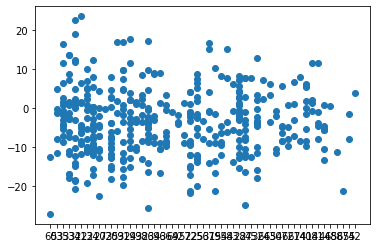

In [178]:
plt.scatter(Age['age'],diffs)

In [223]:
Age

,age,gfp,opg
0,60.0,42.3456,69.509524
1,53.0,62.5594,63.799714
2,35.0,69.8942,78.484476
3,33.0,64.2441,76.002857
4,34.0,61.4710,59.730048
...,...,...,...
414,54.0,64.4355,72.344238
415,28.0,85.7706,91.882095
416,52.0,54.8271,50.855286
417,39.0,72.1179,80.971190


In [225]:
ssp.stats.pearsonr(Age['gfp'],Age['age'])

(0.1715449498548098, 0.0004200939276892666)

In [228]:
ssp.stats.pearsonr(Age['opg'],Age['age'])

(0.11249500432336433, 0.021270326610804077)

In [249]:
cohort1 = Age[(Age['age']>=18) & (Age['age']<=25)]
cohort2 = Age[(Age['age']>=26) & (Age['age']<=33)]
cohort3 = Age[(Age['age']>=34) & (Age['age']<=41)]
cohort4 = Age[(Age['age']>=42)]

In [252]:
for cc in [cohort1,cohort2,cohort3,cohort4]:
    print(len(cc))
    print(cc['age'].min())
    print(cc['age'].max())
    print(ssp.stats.pearsonr(cc['gfp'],cc['opg']))
    print("\n")

109
18.0
25.0
(0.6567489724784848, 8.896019929045346e-15)


146
26.0
33.0
(0.694558373984804, 2.4213792185486733e-22)


77
34.0
41.0
(0.6644733305756378, 4.428536936504608e-11)


87
42.0
74.0
(0.7284240893979534, 1.287577361480726e-15)




In [251]:
cohort1['age'].min()

18.0

In [28]:
bfas_corr = bfas.corr()

In [29]:
bfascorr = bfas_corr['opg'].values

In [34]:
bfasg = pd.read_csv("./bfas_I_OMEGA_5_AS_WRITTEN.csv")

In [35]:
bfasg.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.386703,0.622390,0.218681,-0.214106,-0.062299,0.030659,0.654222,0.345778,0.228575
1,BFAS.2.,0.425251,0.726317,-0.002605,-0.047244,-0.063046,0.064393,0.715798,0.284202,0.252639
2,BFAS.3.,0.431963,0.668023,0.020220,-0.105405,0.101608,-0.007119,0.657384,0.342616,0.283841
3,BFAS.4.,0.432831,0.678741,0.008735,-0.065115,0.067936,-0.000190,0.658442,0.341558,0.284524
4,BFAS.5.,0.444673,0.657038,0.133455,-0.083612,-0.031479,0.059815,0.664607,0.335393,0.297521


In [37]:
bfasg['g'].values

array([ 0.38670279,  0.42525093,  0.43196324,  0.43283051,  0.4446735 ,
        0.37517786,  0.30493186,  0.33518292,  0.35953044,  0.37314795,
        0.48258332,  0.47638516,  0.36534015,  0.55791133,  0.43299116,
        0.38140313,  0.40013134,  0.45468803,  0.39026905,  0.27895714,
        0.29349891,  0.38402321,  0.33484587,  0.3441626 ,  0.35790824,
        0.30530002,  0.28797265,  0.35677066,  0.32362034,  0.27304283,
        0.19095457,  0.01968177,  0.00434281,  0.11854982,  0.28464778,
        0.08326949,  0.2748913 ,  0.24490539,  0.08866643,  0.17366996,
        0.48908853,  0.49848213,  0.44186046,  0.33067273,  0.45846542,
        0.49625447,  0.45959009,  0.37222629,  0.45336961,  0.47398499,
        0.2209184 ,  0.34235989,  0.27579929,  0.11319501,  0.24870958,
        0.24771847,  0.322522  ,  0.13823265,  0.15333849,  0.07127052,
        0.4065077 ,  0.33854676,  0.36493782,  0.39152942,  0.35399073,
        0.33697753,  0.36245724,  0.208386  ,  0.20104625,  0.39

In [41]:
ssp.pearsonr(bfasg['g'],bfascorr[:-1])

(0.68812788856290275, 2.5737024597653789e-15)

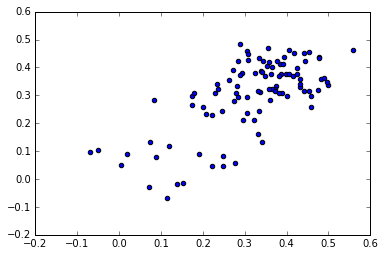

In [42]:
plt.scatter(bfasg['g'],bfascorr[:-1])

In [320]:
## Correlation with the factors

In [321]:
len(ssopg)

419

In [ ]:
#NOW: Scoring as Factor Analyzed

In [331]:
#### AS Factor Analyzed!
#TO DO: Factor Analyze BFAS SII in R; Output to other notebook; use that to scan for highest loading, etc.

In [302]:
neuro_lbl = ['BFAS.2.',
 'BFAS.4.',
 'BFAS.3.',
 'BFAS.5.',
 'BFAS.6.',
 'BFAS.F7.',
 'BFAS.1.',
 'BFAS.9.',
 'BFAS.15.',
 'BFAS.10.',
 'BFAS.12.',
 'BFAS.8.',
 'BFAS.13.',
 'BFAS.16.',
 'BFAS.17.',
 'BFAS.11.',
 'BFAS.19.',
 'BFAS.18.',
 'BFAS.14.',
 'BFAS.20.']

neurols = [2,4,3,5,6,7,1,9,15,10,12,8,13,16,17,11,19,18,14,20] 

In [303]:
print (len(neuro_lbl))
print (len(neurols))

20
20


In [304]:
agree_lbl =['BFAS.23.',
 'BFAS.26.',
 'BFAS.24.',
 'BFAS.27.',
 'BFAS.21.',
 'BFAS.22.',
 'BFAS.25.',
 'BFAS.28.',
 'BFAS.29.',
 'BFAS.30.',
 'BFAS.67.',
 'BFAS.63.',
 'BFAS.62.',
 'BFAS.40.',
 'BFAS.66.',
 'BFAS.100.',
 'BFAS.68.',
 'BFAS.70.',
 'BFAS.96.',
 'BFAS.65.',
 'BFAS.97.',
 'BFAS.69.',
 'BFAS.91.']

agree_ls = [23,26,24,27,21,22,25,28,29,30,67,63,62,40,66,100,68,70,96,65,97,69,91] 


In [305]:
print (len(agree_lbl))
print (len(agree_ls))

23
23


In [306]:
extra_lbl = ['BFAS.71.',
 'BFAS.74.',
 'BFAS.75.',
 'BFAS.78.',
 'BFAS.77.',
 'BFAS.76.',
 'BFAS.73.',
 'BFAS.72.',
 'BFAS.79.',
 'BFAS.61.',
 'BFAS.80.',
 'BFAS.64.',
 'BFAS.37.',
 'BFAS.35.',
 'BFAS.39.',
 'BFAS.38.',
 'BFAS.36.',
 'BFAS.32.',
 'BFAS.34.',
 'BFAS.33.']

extra_ls = [71,74,75,78,77,76,73,72,79,61,80,64,37,35,39,38,36,32,34,33]

In [307]:
print len(extra_lbl)
print len(extra_ls)

SyntaxError: invalid syntax (<ipython-input-307-fd6def35da85>, line 1)

In [308]:
conci_lbl = ['BFAS.52.',
 'BFAS.51.',
 'BFAS.53.',
 'BFAS.56.',
 'BFAS.59.',
 'BFAS.54.',
 'BFAS.42.',
 'BFAS.55.',
 'BFAS.57.',
 'BFAS.58.',
 'BFAS.41.',
 'BFAS.45.',
 'BFAS.46.',
 'BFAS.60.',
 'BFAS.47.',
 'BFAS.43.',
 'BFAS.49.',
 'BFAS.50.',
 'BFAS.31.',
 'BFAS.44.',
 'BFAS.48.']

conci_ls = [52,51,53,56,59,54,42,55,57,58,42,45,46,60,47,43,49,50,31,44,48]

In [50]:
print len(conci_lbl)
print len(conci_ls)

21
21


In [309]:
opn_lbl = ['BFAS.F87.',
 'BFAS.F83.',
 'BFAS.89.',
 'BFAS.81.',
 'BFAS.82.',
 'BFAS.88.',
 'BFAS.90.',
 'BFAS.F84.',
 'BFAS.F85.',
 'BFAS.92.',
 'BFAS.93.',
 'BFAS.F86.',
 'BFAS.98.',
 'BFAS.95.',
 'BFAS.99.',
 'BFAS.94.']

opn_ls = [87,83,89,81,82,88,90,84,85,92,93,86,98,95,99,94]

In [293]:
sorted(opn_ls)

[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 98, 99]

In [319]:
fs

,FactorOrder,diff
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
95,93,3
96,94,3
97,95,3
98,98,1


In [ ]:
for fac in [neurols,agree_ls,conci_ls,extra_ls,opn_ls]:
    sorted(neurols)

In [52]:
print len(opn_lbl)
print len(opn_ls)

16
16


In [261]:
bfasfa = bfas.copy(True)

In [262]:
bfas.columns.values.tolist()

['BFAS-1+',
 'BFAS-2+',
 'BFAS-3+',
 'BFAS-4+',
 'BFAS-5+',
 'BFAS-6+',
 'BFAS-F7-',
 'BFAS-8-',
 'BFAS-9-',
 'BFAS-10-',
 'BFAS-11+',
 'BFAS-12+',
 'BFAS-13+',
 'BFAS-14+',
 'BFAS-15+',
 'BFAS-16+',
 'BFAS-17-',
 'BFAS-18-',
 'BFAS-19-',
 'BFAS-20-',
 'BFAS-21+',
 'BFAS-22+',
 'BFAS-23+',
 'BFAS-24+',
 'BFAS-25+',
 'BFAS-26-',
 'BFAS-27-',
 'BFAS-28-',
 'BFAS-29-',
 'BFAS-30-',
 'BFAS-31+',
 'BFAS-32+',
 'BFAS-33+',
 'BFAS-34+',
 'BFAS-35-',
 'BFAS-36-',
 'BFAS-37-',
 'BFAS-38-',
 'BFAS-39-',
 'BFAS-40-',
 'BFAS-41+',
 'BFAS-42+',
 'BFAS-43+',
 'BFAS-44+',
 'BFAS-45-',
 'BFAS-46-',
 'BFAS-47-',
 'BFAS-48-',
 'BFAS-49-',
 'BFAS-50-',
 'BFAS-51+',
 'BFAS-52+',
 'BFAS-53+',
 'BFAS-54+',
 'BFAS-55+',
 'BFAS-56+',
 'BFAS-57-',
 'BFAS-58-',
 'BFAS-59-',
 'BFAS-60-',
 'BFAS-61+',
 'BFAS-62+',
 'BFAS-63+',
 'BFAS-64+',
 'BFAS-65+',
 'BFAS-66-',
 'BFAS-67-',
 'BFAS-68-',
 'BFAS-69-',
 'BFAS-70-',
 'BFAS-71+',
 'BFAS-72+',
 'BFAS-73+',
 'BFAS-74+',
 'BFAS-75+',
 'BFAS-76+',
 'BFAS-77-',
 'BFAS-

In [263]:
#columns to reverse so that they point towards their named factor
rv_cols = [37,35,39,38,36,32,34,33]


In [264]:
colz = bfasfa.columns.values.tolist()

In [265]:
reverse = [correct_order_bfas[x-1] for x in rv_cols]

In [266]:
for l in reverse:
    bfasfa[l] = 100 - bfasfa[l]

In [267]:
bfas.head()


,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-
0,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,99.89,89.98,59.91,10.24,90.09,30.29,89.87,90.20,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04
1,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,100.00,94.99,49.64,100.00,27.60,100.00,100.00,100.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52
2,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,77.34,70.21,64.98,89.25,89.81,90.03,89.92,10.75,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92
3,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,77.81,85.39,75.14,86.22,87.89,87.67,88.78,79.12,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56
4,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,89.20,89.87,63.47,89.31,52.45,97.55,93.10,92.43,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90


In [268]:
bfasfa.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-
0,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,0.11,10.02,40.09,89.76,9.91,69.71,10.13,9.80,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04
1,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,0.00,5.01,50.36,0.00,72.40,0.00,0.00,0.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52
2,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,22.66,29.79,35.02,10.75,10.19,9.97,10.08,89.25,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92
3,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,22.19,14.61,24.86,13.78,12.11,12.33,11.22,20.88,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56
4,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,10.80,10.13,36.53,10.69,47.55,2.45,6.90,7.57,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90


In [62]:
bfasfa = bfasfa.drop(['gfp'],axis=1)

In [64]:
bfasfa.to_csv("BFAS_STUDY_II_as_FA.csv",index=False)

In [269]:
bfasfa.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-
0,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,0.11,10.02,40.09,89.76,9.91,69.71,10.13,9.80,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04
1,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,0.00,5.01,50.36,0.00,72.40,0.00,0.00,0.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52
2,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,22.66,29.79,35.02,10.75,10.19,9.97,10.08,89.25,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92
3,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,22.19,14.61,24.86,13.78,12.11,12.33,11.22,20.88,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56
4,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,10.80,10.13,36.53,10.69,47.55,2.45,6.90,7.57,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90


In [270]:
### Factor Analyzed + GFP Correlations

In [275]:
ssp.stats.pearsonr(bfasfa.mean(axis=1),ssopg['opg'])

(0.6582426861173535, 2.231886548777629e-53)

In [278]:
bfasfa

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-
0,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,99.89,89.98,59.91,10.24,90.09,30.29,89.87,90.20,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04
1,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,100.00,94.99,49.64,100.00,27.60,100.00,100.00,100.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52
2,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,77.34,70.21,64.98,89.25,89.81,90.03,89.92,10.75,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92
3,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,77.81,85.39,75.14,86.22,87.89,87.67,88.78,79.12,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56
4,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,89.20,89.87,63.47,89.31,52.45,97.55,93.10,92.43,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [287]:
bfasfa.iloc[:,neurols]

,BFAS-3+,BFAS-5+,BFAS-4+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-2+,BFAS-10-,BFAS-16+,BFAS-11+,BFAS-13+,BFAS-9-,BFAS-14+,BFAS-17-,BFAS-18-,BFAS-12+,BFAS-20-,BFAS-19-,BFAS-15+,BFAS-21+
0,60.36,75.39,55.35,65.37,39.87,70.16,30.29,24.83,90.09,10.02,10.02,34.74,79.96,10.02,99.22,10.24,99.33,35.08,80.51,9.69
1,95.08,100.00,100.00,45.45,94.90,100.00,84.88,94.63,100.00,84.88,44.90,100.00,45.81,72.95,82.79,95.17,63.30,84.70,85.43,56.10
2,88.47,8.52,84.35,28.01,76.22,85.91,67.54,31.79,72.44,50.00,37.14,59.74,90.20,52.51,70.10,90.26,44.27,50.00,20.77,88.47
3,50.00,53.92,46.80,39.45,34.61,70.46,66.51,43.52,73.36,30.76,33.10,74.64,47.35,36.28,79.15,69.18,50.00,35.05,61.05,84.61
4,53.01,86.19,58.80,76.06,64.81,75.84,61.58,60.47,52.56,35.97,35.41,82.29,53.90,75.39,76.17,47.22,13.81,74.39,46.55,82.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,67.09,89.48,74.28,73.27,76.34,70.99,35.80,27.12,65.09,73.00,74.11,69.88,90.03,70.43,77.34,72.44,74.11,83.02,75.78,63.20
415,99.64,98.91,98.91,99.82,0.27,99.54,99.73,99.18,99.54,99.64,90.07,100.00,100.00,1.00,99.27,99.09,99.27,95.08,90.16,90.16
416,50.00,50.00,50.00,45.36,44.72,55.37,55.28,44.72,75.14,40.71,50.00,55.65,55.19,65.12,65.30,44.72,24.50,74.77,50.00,50.09
417,70.04,40.76,56.79,100.00,25.39,74.16,69.38,29.73,88.20,100.00,41.09,99.00,83.41,82.07,86.30,100.00,57.02,76.50,74.05,57.68


In [290]:
agree_ls

[23,
 26,
 24,
 27,
 21,
 22,
 25,
 28,
 29,
 30,
 67,
 63,
 62,
 40,
 66,
 100,
 68,
 70,
 96,
 65,
 97,
 69,
 91]

In [291]:
agree_ls-1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [292]:
fdf_stable = bfasfa.iloc[:,[x-1 for x in neurols]]
fdf_open = bfasfa.iloc[:,[x-1 for x in opn_ls]]
fdf_extro = bfasfa.iloc[:,[x-1 for x in extra_ls]]
fdf_conci = bfasfa.iloc[:,[x-1 for x in conci_ls ]]
fdf_agree = bfasfa.iloc[:,[x-1 for x in agree_ls]]


# In[25]:

fdf_stable['stability'] = fdf_stable.mean(axis=1)
fdf_open['openness'] = fdf_open.mean(axis=1) 
fdf_extro['extro'] = fdf_extro.mean(axis=1)
fdf_conci['conci'] = fdf_conci.mean(axis=1)
fdf_agree['agree'] = fdf_agree.mean(axis=1)


# In[26]:

fmeasures = [fdf_stable['stability'],fdf_open['openness'],fdf_extro['extro'],fdf_conci['conci'],fdf_agree['agree']]


# In[27]:

for construct,label in zip(fmeasures,['STABILITY','OPENNESS','EXTROVERSION','CONSCIENTIOUSNESS','AGREEABLENESS']):
    print("\n")
    print(label)
    print (ssp.pearsonr(ssopg['opg'],construct))
    print (ssp.spearmanr(ssopg['opg'],construct))



STABILITY
(0.48462182046148683, 4.6033497701678716e-26)
SpearmanrResult(correlation=0.5066458726551679, pvalue=1.0541213382953923e-28)


OPENNESS
(0.5905671580127417, 9.596440822921654e-41)
SpearmanrResult(correlation=0.5765540921533152, pvalue=1.7313523529278195e-38)


EXTROVERSION
(0.24837613754884397, 2.60676015085898e-07)
SpearmanrResult(correlation=0.20046590766349592, pvalue=3.577363636262349e-05)


CONSCIENTIOUSNESS
(0.268895081778667, 2.2575989756012944e-08)
SpearmanrResult(correlation=0.2976399558236011, pvalue=5.107534207758633e-10)


AGREEABLENESS
(0.5887122258196276, 1.9369000465100553e-40)
SpearmanrResult(correlation=0.5894471991480876, pvalue=1.4672185175078393e-40)


<ipython-input-292-ed9761b397ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf_stable['stability'] = fdf_stable.mean(axis=1)
<ipython-input-292-ed9761b397ff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf_open['openness'] = fdf_open.mean(axis=1)
<ipython-input-292-ed9761b397ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [331]:
opg.to_csv("2021_OPG_BFAS_STUDY2.csv",index=False)

In [332]:
!pwd

/Users/Evan/Dropbox/Delphy Research Dropbox/Delphy Tech/research/Openness-to-Personal-Growth/Code for Data Analysis _ Scripts/Study II/BFAS/General_Factor_Extraction_and_Correlations


In [ ]:
PBR = ['PBR_3+','PBR_1+','PBR_5+','PBR_4+']
EG = ['IE_19+','IE_22-','IE_20+','OPG_15+','IE_21+']
MAL = ['PBR_7-','Extra_27-','OPG_17-','PBR_8-','PBR_2-','OPG_11-']
LM = ['Extra_28+','OPG_12+','OPG_10+','OPG_13+','OPG_9+']
CZ = ['IE_25-','PBR_6-','IE_24+','OPG_13+']

In [329]:
ssopg

,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-,OPG_9+,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_15+,OPG_17-,IE_19+,IE_20+,IE_21+,IE_22-,IE_24+,IE_25-,opg
0,100.000,70.38,100.000,99.78,99.89,89.53,99.67,99.55,39.64,90.20,90.31,74.39,29.51,100.000,89.98,34.41,75.17,1.12,10.13,0.67,65.37,69.509524
1,88.566,82.42,88.368,72.31,61.93,77.32,75.05,79.69,100.00,100.00,10.11,59.02,59.93,100.000,55.37,9.84,29.14,55.20,27.69,77.60,30.24,63.799714
2,50.000,89.14,69.778,90.03,83.74,90.48,29.34,91.04,72.77,99.83,90.59,72.10,50.00,94.286,90.48,100.00,90.92,100.00,79.23,64.42,50.00,78.484476
3,91.008,68.62,91.404,87.17,81.43,54.15,81.10,73.41,67.23,87.17,80.65,50.00,77.37,85.618,74.08,89.95,88.95,100.00,46.35,50.00,70.40,76.002857
4,87.235,55.68,89.930,56.24,79.06,13.92,66.48,61.92,42.98,63.25,22.05,80.18,74.83,37.746,82.74,47.22,44.54,100.00,45.10,54.79,48.44,59.730048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,93.307,80.01,93.307,75.56,73.78,73.33,69.32,84.02,73.22,86.47,34.02,80.18,74.89,78.545,26.00,89.70,85.24,100.00,23.55,50.00,74.78,72.344238
415,82.857,95.26,94.077,85.20,84.70,90.07,89.98,99.36,89.98,99.00,90.53,90.07,89.71,100.000,99.27,99.45,90.26,100.00,89.98,75.05,94.72,91.882095
416,60.615,40.16,71.736,55.10,50.00,39.34,54.92,44.99,59.65,55.28,39.34,53.92,35.70,50.000,45.36,39.71,55.10,100.00,30.33,31.15,55.56,50.855286
417,93.978,91.31,94.957,87.97,92.09,60.91,76.61,94.10,89.53,85.97,89.76,84.30,76.95,50.000,95.77,50.00,90.42,100.00,29.51,77.17,89.09,80.971190


In [334]:
bfas.to_csv("2021_BFAS_STUDYII_OUTPUT.csv")

In [335]:
!pwd

/Users/Evan/Dropbox/Delphy Research Dropbox/Delphy Tech/research/Openness-to-Personal-Growth/Code for Data Analysis _ Scripts/Study II/BFAS/General_Factor_Extraction_and_Correlations


In [65]:
bg2 = pd.read_csv("./bfas_II_OMEGA_5_AS_FACTOR_ANALYZED.csv")

In [66]:
bg2.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.386703,0.622390,0.218681,-0.214106,-0.062299,0.030659,0.654222,0.345778,0.228575
1,BFAS.2.,0.425251,0.726317,-0.002605,-0.047244,-0.063046,0.064393,0.715798,0.284202,0.252639
2,BFAS.3.,0.431963,0.668023,0.020220,-0.105405,0.101608,-0.007119,0.657384,0.342616,0.283841
3,BFAS.4.,0.432831,0.678741,0.008735,-0.065115,0.067936,-0.000190,0.658442,0.341558,0.284524
4,BFAS.5.,0.444673,0.657038,0.133455,-0.083612,-0.031479,0.059815,0.664607,0.335393,0.297521


In [68]:
bfasfa['opg'] = ssopg['opg']

In [69]:
bfcorr2 = bfasfa.corr()

In [77]:
ssp.pearsonr(bfcorr2['opg'].values[0:-1],bg2['g'].values)

(0.84330730423683053, 3.5413180001863023e-28)